In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
import pandas as pd
import os
import glob


In [63]:
def evaluate( trainX , trainY , testX , testY,y_hat):
    print("\n#################\n")

    
    testY = trainY[0:50]
    trainY = trainY[0:50]
    trainX = trainX[0:50]
    testX = testX[0:50]
    y_hat = y_hat[0:50]
    rmse_tr =  metrics.mean_squared_error(trainY, y_hat)
    rmse_te =  metrics.mean_squared_error(testY, y_hat)

    mae_tr = metrics.mean_absolute_error(trainY, y_hat)
    mae_te = metrics.mean_absolute_error(testY, y_hat)

    print("RMSE train:", rmse_tr)
    print("RMSE test:", rmse_te)

    print("MAE train:", mae_tr)
    print("MAE test:", mae_te)

    return rmse_tr , rmse_te ,mae_tr , mae_te


In [64]:
# list all csv files only
#csv_files = glob.glob('*.{}'.format('csv'),)
csv_files


dirty_training_set = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
dirty_training_set 

,x,t
0,0.023734,0.148573
1,0.081460,0.489775
2,0.112843,0.651087
3,0.124001,0.702655
4,0.162254,0.851831
...,...,...
125,0.478111,0.148766
126,0.151536,0.814702
127,0.218638,-3.000000
128,0.724561,-0.991484


In [65]:
df_test = pd.read_csv('data3.csv')

In [66]:
training_set = dirty_training_set.dropna() 

In [67]:
print ("Rows before clean: ", dirty_training_set.size, "\n")
print ("Rows after clean: ", training_set.size, "\n")

Rows before clean:  260 

Rows after clean:  260 



In [68]:
x_training_set = training_set['x'].values
y_training_set = training_set['t'].values

In [69]:
X_test = df_test['x'].values
y_test = df_test['t'].values

In [70]:
lin = LinearRegression()
lin.fit(x_training_set.reshape(-1,1),y_training_set)


y_hat1 = lin.predict(x_training_set.reshape(-1,1))

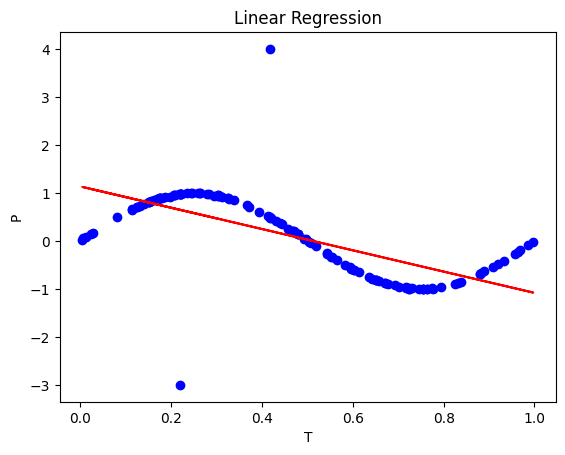

In [71]:
plt.scatter(x_training_set, y_training_set , color = 'blue')
plt.plot(x_training_set, y_hat1, color = 'red')
plt.title('Linear Regression')
plt.xlabel('T')
plt.ylabel('P')
  
plt.show()

In [72]:
print(evaluate( x_training_set, y_training_set , X_test , y_test,y_hat1))


#################

RMSE train: 0.1795179504870559
RMSE test: 0.1795179504870559
MAE train: 0.3691730260956962
MAE test: 0.3691730260956962
(0.1795179504870559, 0.1795179504870559, 0.3691730260956962, 0.3691730260956962)


In [73]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_training_set.reshape(-1,1))
poly.fit(X_poly, y_training_set)
lin2 = LinearRegression()
lin2.fit(X_poly, y_training_set)

y_hat2 = lin2.predict(poly.fit_transform(x_training_set.reshape(-1,1)))

In [74]:
# Visualising the Linear Regression results
plt.scatter( color = 'blue')
  
plt.plot(x_training_set, y_hat1, color = 'red')
plt.title('Linear Regression')
plt.xlabel('T')
plt.ylabel('P')
plt.show()
plt.plot(x_training_set, y_hat2, color = 'red')
plt.title('Linear Regression')
plt.xlabel('T')
plt.ylabel('P')
  
plt.show()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
print(evaluate( x_training_set, y_training_set , X_test , y_test,y_hat2))

In [ ]:
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(x_training_set.reshape(-1,1))

poly.fit(X_poly, y_training_set)
lin2 = LinearRegression()
lin2.fit(X_poly, y_training_set)

y_hat3 = lin2.predict(poly.fit_transform(x_training_set.reshape(-1,1)))

In [ ]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(x_training_set, y_hat, color = 'red')
plt.title('Linear Regression')
plt.xlabel('T')
plt.ylabel('P')
  
plt.show()

In [ ]:
print(evaluate( x_training_set, y_training_set , X_test , y_test,y_hat3))